In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
# URL of page number 1
url = 'https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;home_or_away=1;page=1;spanmin1=01+Jan+2016;spanval1=span;template=results;type=team;view=results'

In [3]:
text = urlopen(url) # opening the webpage in python

In [4]:
print(text)

In [5]:
soup = BeautifulSoup(text, "lxml") # getting the HTML of the webpage using BeautifulSoup(_HTTP_Response_, "lxml")

In [6]:
print(soup)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<!-- hostname: web02, edition-view: , country: unknown, cluster: www, created: 2022-04-09 19:12:35 --><html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head>
<script type="text/javascript">var _sf_startpt=(new Date()).getTime()</script>
<meta content="ZxdgH3XglRg0Bsy-Ho2RnO3EE4nRs53FloLS6fkt_nc" name="google-site-verification"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/>
<title>Team records | One-Day Internationals | Cricinfo Statsguru | ESPNcricinfo.com</title>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="" name="keywords"/>
<meta content="" name="description"/>
<!--[if IE 9]>
<script language="javascript" type="text/javascript">
function fnCreateJumpList(iScenario) {
fnClearJu

In [7]:
table = soup.findAll('table', attrs = {'class' : 'engineTable'}) # finding all the tables with class as engineTable in the HTML of webpage
int_table = 0 # defining a variable which will store the HTML of the table of our interest
for temp_table in table: # running a loop over all the tables with class engineTable
    caption_tag = temp_table.findAll('caption') # Looking for caption tag in each table's HTML
    if(len(caption_tag) > 0): # checking if there is any caption tag in the table
        int_table = temp_table # if a caption tag is found then save this table as the table of our interest

In [8]:
print(int_table)

<table class="engineTable">
<caption>Match results</caption>
<thead>
<tr class="headlinks">
<th class="left" nowrap=""><a class="black-link" href="/ci/engine/stats/index.html?class=2;home_or_away=1;orderby=team;spanmin1=01+Jan+2016;spanval1=span;template=results;type=team;view=results" title="sort by team name">Team</a></th>
<th class="left" nowrap=""><a class="black-link" href="/ci/engine/stats/index.html?class=2;home_or_away=1;orderby=result;spanmin1=01+Jan+2016;spanval1=span;template=results;type=team;view=results" title="sort by result of match">Result</a></th>
<th class="left" nowrap=""><a class="black-link" href="/ci/engine/stats/index.html?class=2;home_or_away=1;orderby=amount;spanmin1=01+Jan+2016;spanval1=span;template=results;type=team;view=results" title="sort by result margin">Margin</a></th>
<th nowrap=""><a class="black-link" href="/ci/engine/stats/index.html?class=2;home_or_away=1;orderby=amount_balls;spanmin1=01+Jan+2016;spanval1=span;template=results;type=team;view=resu

In [9]:
tr_list = int_table.findAll('tr', attrs = {'class': 'data1'}) # getting all the rows in the table

In [10]:
print(tr_list)

[<tr class="data1">
<td class="left" nowrap="nowrap"><a class="data-link" href="/ci/content/team/5.html">New Zealand</a></td>
<td class="left">n/r</td>
<td class="left" nowrap="nowrap">-</td>
<td></td>
<td class="left">lost</td>
<td class="left">1st</td>
<td></td>
<td class="left" nowrap="nowrap">v <a class="data-link" href="/ci/content/team/8.html">Sri Lanka</a></td>
<td class="left"><a class="data-link" href="/ci/content/ground/424917.html">Nelson</a></td>
<td nowrap="nowrap"><b>2 Jan 2016</b></td>
<td class="padDD"><a href="javascript:void(0)" onmouseout="menuLayers.hide()" onmouseover="menuLayers.show('engine-dd1', event); window.status='investigate this query'; return true"><img alt="investigate this query" border="0" height="11" src="http://i.imgci.com/espncricinfo/guruInvestigate.gif" width="11"/></a></td>
</tr>, <tr class="data1">
<td class="left" nowrap="nowrap"><a class="data-link" href="/ci/content/team/5.html">New Zealand</a></td>
<td class="left">won</td>
<td class="left" 

In [11]:
print(len(tr_list))

50


In [12]:
master_data = [] # list to contain all the rows in our table
for tr in tr_list:
    td_list = tr.findAll('td') # finding all the td tags in a row
    row_data = [] # list to save the data of each row
    for td in td_list:
        td_str = str(td) # converting HTML of the td tag from BeautifulSoup HTML code to string datatype
        cleantext = BeautifulSoup(td_str, "lxml").get_text() # removing all the unecssary tags from the HTML of td to get only the text written in that tag on webpage
        row_data.append(cleantext) # appendng that data to row data
    master_data.append(row_data) # appending the entire row data to our master data (containing all rows)

In [13]:
master_data

[['New Zealand',
  'n/r',
  '-',
  '',
  'lost',
  '1st',
  '',
  'v Sri Lanka',
  'Nelson',
  '2 Jan 2016',
  ''],
 ['New Zealand',
  'won',
  '36 runs',
  '',
  'lost',
  '1st',
  '',
  'v Sri Lanka',
  'Mount Maunganui',
  '5 Jan 2016',
  ''],
 ['Australia',
  'won',
  '5 wickets',
  '4',
  'lost',
  '2nd',
  '',
  'v India',
  'Perth',
  '12 Jan 2016',
  ''],
 ['Australia',
  'won',
  '7 wickets',
  '6',
  'lost',
  '2nd',
  '',
  'v India',
  'Brisbane',
  '15 Jan 2016',
  ''],
 ['Australia',
  'won',
  '3 wickets',
  '7',
  'won',
  '2nd',
  '',
  'v India',
  'Melbourne',
  '17 Jan 2016',
  ''],
 ['Australia',
  'won',
  '25 runs',
  '',
  'won',
  '1st',
  '',
  'v India',
  'Canberra',
  '20 Jan 2016',
  ''],
 ['Australia',
  'lost',
  '6 wickets',
  '2',
  'lost',
  '1st',
  '',
  'v India',
  'Sydney',
  '23 Jan 2016',
  ''],
 ['New Zealand',
  'won',
  '70 runs',
  '',
  'lost',
  '1st',
  '',
  'v Pakistan',
  'Wellington',
  '25 Jan 2016',
  ''],
 ['Hong Kong',
  'won',
 

In [14]:
master_data = [] # list to contain all the rows in our tables of all the pages of the query
for k in range(1,12): # varying value of k from 1 to 11
    url = 'https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;home_or_away=1;page=' + str(k) + ';spanmin1=01+Jan+2016;spanval1=span;template=results;type=team;view=results' # URL of page number 'k' 
    text = urlopen(url) # opening the webpage in python
    soup = BeautifulSoup(text, "lxml") # getting the HTML of the webpage using BeautifulSoup(_HTTP_Response_, "lxml")
    table = soup.findAll('table', attrs = {'class' : 'engineTable'}) # finding all the tables with class as engineTable in the HTML of webpage
    int_table = 0 # defining a variable which will store the HTML of the table of our interest
    for temp_table in table: # running a loop over all the tables with class engineTable
        caption_tag = temp_table.findAll('caption') # Looking for caption tag in each table's HTML
        if(len(caption_tag) > 0): # checking if there is any caption tag in the table
            int_table = temp_table # if a caption tag is found then save this table as the table of our interest
    tr_list = int_table.findAll('tr', attrs = {'class': 'data1'}) # getting all the rows in the table
    for tr in tr_list:
        td_list = tr.findAll('td') # finding all the td tags in a row
        row_data = [] # list to save the data of each row
        for td in td_list:
            td_str = str(td) # converting HTML of the td tag from BeautifulSoup HTML code to string datatype
            cleantext = BeautifulSoup(td_str, "lxml").get_text() # removing all the unnecessary tags from the HTML of td to get only the text written in that tag on webpage
            row_data.append(cleantext) # appendng that data to row data
        master_data.append(row_data) # appending the entire row data to our master data (containing all rows)

In [15]:
print(len(master_data))

550


In [16]:
master_data_df = pd.DataFrame(master_data)

In [17]:
master_data_df

,0,1,2,3,4,5,6,7,8,9,10
0,New Zealand,n/r,-,,lost,1st,,v Sri Lanka,Nelson,2 Jan 2016,
1,New Zealand,won,36 runs,,lost,1st,,v Sri Lanka,Mount Maunganui,5 Jan 2016,
2,Australia,won,5 wickets,4,lost,2nd,,v India,Perth,12 Jan 2016,
3,Australia,won,7 wickets,6,lost,2nd,,v India,Brisbane,15 Jan 2016,
4,Australia,won,3 wickets,7,won,2nd,,v India,Melbourne,17 Jan 2016,
...,...,...,...,...,...,...,...,...,...,...,...
545,New Zealand,won,118 runs,,lost,1st,,v Netherlands,Hamilton,2 Apr 2022,
546,Pakistan,won,9 wickets,73,won,2nd,,v Australia,Lahore,2 Apr 2022,
547,New Zealand,won,115 runs,,won,1st,,v Netherlands,Hamilton,4 Apr 2022,
548,U.S.A.,canc,-,,-,-,,v Ireland,Lauderhill,29 Dec 2021,


In [18]:
# renaming the columns
master_data_df.columns = ["Team", "Result", "Margin", "Balls Remaining", "Toss", "Bat", "None1", "Opposition" , "Ground", "Start Date", "None2"]

In [19]:
master_data_df

,Team,Result,Margin,Balls Remaining,Toss,Bat,None1,Opposition,Ground,Start Date,None2
0,New Zealand,n/r,-,,lost,1st,,v Sri Lanka,Nelson,2 Jan 2016,
1,New Zealand,won,36 runs,,lost,1st,,v Sri Lanka,Mount Maunganui,5 Jan 2016,
2,Australia,won,5 wickets,4,lost,2nd,,v India,Perth,12 Jan 2016,
3,Australia,won,7 wickets,6,lost,2nd,,v India,Brisbane,15 Jan 2016,
4,Australia,won,3 wickets,7,won,2nd,,v India,Melbourne,17 Jan 2016,
...,...,...,...,...,...,...,...,...,...,...,...
545,New Zealand,won,118 runs,,lost,1st,,v Netherlands,Hamilton,2 Apr 2022,
546,Pakistan,won,9 wickets,73,won,2nd,,v Australia,Lahore,2 Apr 2022,
547,New Zealand,won,115 runs,,won,1st,,v Netherlands,Hamilton,4 Apr 2022,
548,U.S.A.,canc,-,,-,-,,v Ireland,Lauderhill,29 Dec 2021,


In [20]:
#saving the data scraped
master_data_df.to_csv('ODI_toss_data_2016_2022.csv')

In [21]:
#dropping the columns
master_data_df = master_data_df.drop(['None1', 'None2'], axis = 1) # .drop(list_of_columns_to_be_dropped)
# axis=0, if we have to remove rows and axis=1, if we have to remove columns

In [22]:
master_data_df

,Team,Result,Margin,Balls Remaining,Toss,Bat,Opposition,Ground,Start Date
0,New Zealand,n/r,-,,lost,1st,v Sri Lanka,Nelson,2 Jan 2016
1,New Zealand,won,36 runs,,lost,1st,v Sri Lanka,Mount Maunganui,5 Jan 2016
2,Australia,won,5 wickets,4,lost,2nd,v India,Perth,12 Jan 2016
3,Australia,won,7 wickets,6,lost,2nd,v India,Brisbane,15 Jan 2016
4,Australia,won,3 wickets,7,won,2nd,v India,Melbourne,17 Jan 2016
...,...,...,...,...,...,...,...,...,...
545,New Zealand,won,118 runs,,lost,1st,v Netherlands,Hamilton,2 Apr 2022
546,Pakistan,won,9 wickets,73,won,2nd,v Australia,Lahore,2 Apr 2022
547,New Zealand,won,115 runs,,won,1st,v Netherlands,Hamilton,4 Apr 2022
548,U.S.A.,canc,-,,-,-,v Ireland,Lauderhill,29 Dec 2021


In [23]:
# removing "v " from opposition column
master_data_df["Opposition"] = master_data_df["Opposition"].str.replace("v ", "")
# we have replaced "v " with empty string so that we now have only the name of the team in Opposition column

In [24]:
master_data_df

,Team,Result,Margin,Balls Remaining,Toss,Bat,Opposition,Ground,Start Date
0,New Zealand,n/r,-,,lost,1st,Sri Lanka,Nelson,2 Jan 2016
1,New Zealand,won,36 runs,,lost,1st,Sri Lanka,Mount Maunganui,5 Jan 2016
2,Australia,won,5 wickets,4,lost,2nd,India,Perth,12 Jan 2016
3,Australia,won,7 wickets,6,lost,2nd,India,Brisbane,15 Jan 2016
4,Australia,won,3 wickets,7,won,2nd,India,Melbourne,17 Jan 2016
...,...,...,...,...,...,...,...,...,...
545,New Zealand,won,118 runs,,lost,1st,Netherlands,Hamilton,2 Apr 2022
546,Pakistan,won,9 wickets,73,won,2nd,Australia,Lahore,2 Apr 2022
547,New Zealand,won,115 runs,,won,1st,Netherlands,Hamilton,4 Apr 2022
548,U.S.A.,canc,-,,-,-,Ireland,Lauderhill,29 Dec 2021


In [25]:
toss_team = [] # a list to contain each row's value of new column
for index, row in master_data_df.iterrows(): # for loop on the dataframe
    if(row["Toss"] == "won"): # if the toss value is won, then the team who won the toss is Home team
        toss_team.append(row["Team"])
    else: # if the toss value is lost, then the team who won the toss is opposition
        toss_team.append(row["Opposition"])

In [26]:
toss_team

['Sri Lanka',
 'Sri Lanka',
 'India',
 'India',
 'Australia',
 'Australia',
 'India',
 'Pakistan',
 'Scotland',
 'Pakistan',
 'Scotland',
 'Pakistan',
 'Australia',
 'England',
 'New Zealand',
 'South Africa',
 'Australia',
 'England',
 'South Africa',
 'South Africa',
 'South Africa',
 'Australia',
 'India',
 'India',
 'West Indies',
 'Zimbabwe',
 'West Indies',
 'Ireland',
 'Ireland',
 'England',
 'Australia',
 'Sri Lanka',
 'South Africa',
 'England',
 'Australia',
 'England',
 'Sri Lanka',
 'Scotland',
 'Afghanistan',
 'Afghanistan',
 'Ireland',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'U.A.E.',
 'U.A.E.',
 'Ireland',
 'Pakistan',
 'Australia',
 'Sri Lanka',
 'Pakistan',
 'Pakistan',
 'Sri Lanka',
 'England',
 'Sri Lanka',
 'Pakistan',
 'Sri Lanka',
 'Pakistan',
 'Hong Kong',
 'Scotland',
 'Ireland',
 'Bangladesh',
 'Afghanistan',
 'South Africa',
 'Bangladesh',
 'Australia',
 'Australia',
 'England',
 'Australia',
 'England',
 'England',
 'South Africa',
 'India',
 'India'

In [27]:
# Adding this column to dataframe
master_data_df["toss_team"] = toss_team

In [28]:
master_data_df

,Team,Result,Margin,Balls Remaining,Toss,Bat,Opposition,Ground,Start Date,toss_team
0,New Zealand,n/r,-,,lost,1st,Sri Lanka,Nelson,2 Jan 2016,Sri Lanka
1,New Zealand,won,36 runs,,lost,1st,Sri Lanka,Mount Maunganui,5 Jan 2016,Sri Lanka
2,Australia,won,5 wickets,4,lost,2nd,India,Perth,12 Jan 2016,India
3,Australia,won,7 wickets,6,lost,2nd,India,Brisbane,15 Jan 2016,India
4,Australia,won,3 wickets,7,won,2nd,India,Melbourne,17 Jan 2016,Australia
...,...,...,...,...,...,...,...,...,...,...
545,New Zealand,won,118 runs,,lost,1st,Netherlands,Hamilton,2 Apr 2022,Netherlands
546,Pakistan,won,9 wickets,73,won,2nd,Australia,Lahore,2 Apr 2022,Pakistan
547,New Zealand,won,115 runs,,won,1st,Netherlands,Hamilton,4 Apr 2022,New Zealand
548,U.S.A.,canc,-,,-,-,Ireland,Lauderhill,29 Dec 2021,Ireland


In [29]:
master_data_df["Result"].unique()

array(['n/r', 'won', 'lost', 'aban', 'tied', 'canc'], dtype=object)

In [30]:
team_lost = [] # a list to contain the name of the team who lost the match for each row
for index, row in master_data_df.iterrows(): # for loop for the entire dataframe
    if(row["Result"] == "won"): # if the Result is won, then the team that lost the match is opposition
        team_lost.append(row["Opposition"])
    elif(row["Result"] == "lost"): # if the Result is lost, then the team that lost the match is Home
        team_lost.append(row["Team"])
    else: # if the Result is no result, abandoned, tied or cancelled then the match result is other. We can assign team lost as none.
        team_lost.append("none")

In [31]:
team_lost

['none',
 'Sri Lanka',
 'India',
 'India',
 'India',
 'India',
 'Australia',
 'Pakistan',
 'Scotland',
 'none',
 'none',
 'Pakistan',
 'Australia',
 'South Africa',
 'New Zealand',
 'South Africa',
 'Australia',
 'England',
 'England',
 'England',
 'South Africa',
 'West Indies',
 'Zimbabwe',
 'Zimbabwe',
 'Australia',
 'Zimbabwe',
 'West Indies',
 'Ireland',
 'Ireland',
 'none',
 'West Indies',
 'Sri Lanka',
 'South Africa',
 'none',
 'West Indies',
 'Sri Lanka',
 'Sri Lanka',
 'none',
 'Scotland',
 'none',
 'Ireland',
 'Afghanistan',
 'Ireland',
 'Afghanistan',
 'U.A.E.',
 'U.A.E.',
 'Ireland',
 'none',
 'Sri Lanka',
 'Australia',
 'Pakistan',
 'Pakistan',
 'Sri Lanka',
 'Pakistan',
 'Sri Lanka',
 'Pakistan',
 'Sri Lanka',
 'England',
 'none',
 'Hong Kong',
 'Ireland',
 'Afghanistan',
 'Bangladesh',
 'Australia',
 'Afghanistan',
 'Australia',
 'Australia',
 'Bangladesh',
 'Australia',
 'England',
 'Bangladesh',
 'Australia',
 'New Zealand',
 'India',
 'New Zealand',
 'India',
 'New Z

In [32]:
# Adding this column to dataframe
master_data_df["team_lost"] = team_lost

In [33]:
master_data_df

,Team,Result,Margin,Balls Remaining,Toss,Bat,Opposition,Ground,Start Date,toss_team,team_lost
0,New Zealand,n/r,-,,lost,1st,Sri Lanka,Nelson,2 Jan 2016,Sri Lanka,none
1,New Zealand,won,36 runs,,lost,1st,Sri Lanka,Mount Maunganui,5 Jan 2016,Sri Lanka,Sri Lanka
2,Australia,won,5 wickets,4,lost,2nd,India,Perth,12 Jan 2016,India,India
3,Australia,won,7 wickets,6,lost,2nd,India,Brisbane,15 Jan 2016,India,India
4,Australia,won,3 wickets,7,won,2nd,India,Melbourne,17 Jan 2016,Australia,India
...,...,...,...,...,...,...,...,...,...,...,...
545,New Zealand,won,118 runs,,lost,1st,Netherlands,Hamilton,2 Apr 2022,Netherlands,Netherlands
546,Pakistan,won,9 wickets,73,won,2nd,Australia,Lahore,2 Apr 2022,Pakistan,Australia
547,New Zealand,won,115 runs,,won,1st,Netherlands,Hamilton,4 Apr 2022,New Zealand,Netherlands
548,U.S.A.,canc,-,,-,-,Ireland,Lauderhill,29 Dec 2021,Ireland,none


In [34]:
won_toss_lost_match = [] # defining a list that will contain the 0/1 values for each row in the dataframe
for index, row in master_data_df.iterrows(): # for loop over the entire dataframe
    if(row["toss_team"] == row["team_lost"]): # if the team who lost the toss, has also lost the match, then the value will be 1
        won_toss_lost_match.append(1)
    else: # if the team who lost the toss, has not lost the match, then the value will be 0
        won_toss_lost_match.append(0)

In [35]:
won_toss_lost_match

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,


In [36]:
# Adding the column to dataframe
master_data_df["toss_data"] = won_toss_lost_match

In [37]:
master_data_df

,Team,Result,Margin,Balls Remaining,Toss,Bat,Opposition,Ground,Start Date,toss_team,team_lost,toss_data
0,New Zealand,n/r,-,,lost,1st,Sri Lanka,Nelson,2 Jan 2016,Sri Lanka,none,0
1,New Zealand,won,36 runs,,lost,1st,Sri Lanka,Mount Maunganui,5 Jan 2016,Sri Lanka,Sri Lanka,1
2,Australia,won,5 wickets,4,lost,2nd,India,Perth,12 Jan 2016,India,India,1
3,Australia,won,7 wickets,6,lost,2nd,India,Brisbane,15 Jan 2016,India,India,1
4,Australia,won,3 wickets,7,won,2nd,India,Melbourne,17 Jan 2016,Australia,India,0
...,...,...,...,...,...,...,...,...,...,...,...,...
545,New Zealand,won,118 runs,,lost,1st,Netherlands,Hamilton,2 Apr 2022,Netherlands,Netherlands,1
546,Pakistan,won,9 wickets,73,won,2nd,Australia,Lahore,2 Apr 2022,Pakistan,Australia,0
547,New Zealand,won,115 runs,,won,1st,Netherlands,Hamilton,4 Apr 2022,New Zealand,Netherlands,0
548,U.S.A.,canc,-,,-,-,Ireland,Lauderhill,29 Dec 2021,Ireland,none,0


In [38]:
teams = master_data_df["toss_team"].unique().tolist() # first we use the unique() function to find all the unique values in
# the "toss_team" column and then convert that output array into a list using tolist() function because we are more
# comfortable working with lists.

In [39]:
teams

['Sri Lanka',
 'India',
 'Australia',
 'Pakistan',
 'Scotland',
 'England',
 'New Zealand',
 'South Africa',
 'West Indies',
 'Zimbabwe',
 'Ireland',
 'Afghanistan',
 'U.A.E.',
 'Hong Kong',
 'Bangladesh',
 'P.N.G.',
 'Netherlands',
 'Nepal',
 'Namibia',
 'Oman',
 'U.S.A.']

In [40]:
loss_percentage = [] # loss percentage list for each team
for team in teams: # running a for loop on teams list, taking one team per iteration
    filtered_df = master_data_df[master_data_df["toss_team"] == team] # filtering the data where toss_team is equal to the name of our concerened team
    num_of_matches = len(filtered_df) # calculating total number of matches where the team has won the toss
    lost_df = filtered_df[filtered_df["toss_data"] == 1] # filtering only the rows where team has lost the match after winning the toss
    lost_count = len(lost_df) # calculating number of times the team has lost the match after winning the toss
    loss_percent = lost_count/num_of_matches*100 # calculating loss percentage
    temp = [] # creating an empty list to store losing percentage and team name
    temp.append(team) # adding team name in temp list
    temp.append(num_of_matches)
    temp.append(loss_percent) # adding loss_percent in temp list
    loss_percentage.append(temp) # adding temp list to the main loss percentage list

In [41]:
loss_percentage

[['Sri Lanka', 48, 54.166666666666664],
 ['India', 41, 31.70731707317073],
 ['Australia', 48, 54.166666666666664],
 ['Pakistan', 28, 46.42857142857143],
 ['Scotland', 19, 42.10526315789473],
 ['England', 52, 21.153846153846153],
 ['New Zealand', 37, 21.62162162162162],
 ['South Africa', 47, 38.297872340425535],
 ['West Indies', 35, 65.71428571428571],
 ['Zimbabwe', 29, 58.620689655172406],
 ['Ireland', 39, 58.97435897435898],
 ['Afghanistan', 17, 41.17647058823529],
 ['U.A.E.', 24, 50.0],
 ['Hong Kong', 3, 33.33333333333333],
 ['Bangladesh', 37, 35.13513513513514],
 ['P.N.G.', 8, 75.0],
 ['Netherlands', 11, 36.36363636363637],
 ['Nepal', 10, 50.0],
 ['Namibia', 5, 40.0],
 ['Oman', 7, 28.57142857142857],
 ['U.S.A.', 5, 60.0]]

In [42]:
loss_percentage_df = pd.DataFrame(loss_percentage)

In [43]:
loss_percentage_df

,0,1,2
0,Sri Lanka,48,54.166667
1,India,41,31.707317
2,Australia,48,54.166667
3,Pakistan,28,46.428571
4,Scotland,19,42.105263
5,England,52,21.153846
6,New Zealand,37,21.621622
7,South Africa,47,38.297872
8,West Indies,35,65.714286
9,Zimbabwe,29,58.620690


In [44]:
loss_percentage_df.columns = ['Team', 'Matches played', 'Loss percentage']

In [45]:
loss_percentage_df

,Team,Matches played,Loss percentage
0,Sri Lanka,48,54.166667
1,India,41,31.707317
2,Australia,48,54.166667
3,Pakistan,28,46.428571
4,Scotland,19,42.105263
5,England,52,21.153846
6,New Zealand,37,21.621622
7,South Africa,47,38.297872
8,West Indies,35,65.714286
9,Zimbabwe,29,58.620690


Since we are considering a period of over 6 years, let's include only those teams which have played at least 15 ODIs so that each row has a decent sample size.

In [46]:
loss_percentage_df = loss_percentage_df[loss_percentage_df['Matches played'] >= 15]

In [47]:
loss_percentage_df

,Team,Matches played,Loss percentage
0,Sri Lanka,48,54.166667
1,India,41,31.707317
2,Australia,48,54.166667
3,Pakistan,28,46.428571
4,Scotland,19,42.105263
5,England,52,21.153846
6,New Zealand,37,21.621622
7,South Africa,47,38.297872
8,West Indies,35,65.714286
9,Zimbabwe,29,58.620690


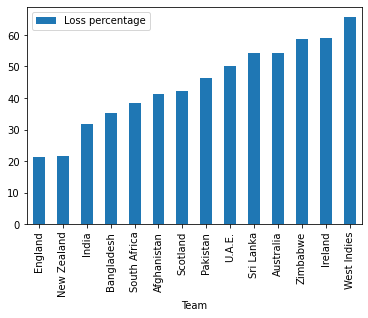

In [48]:
loss_percentage_df.sort_values(by='Loss percentage').plot.bar(x='Team', y='Loss percentage')
plt.show()

# Conclusion
- The plot gives us a clear indication that England and New Zealand have done exceptionally well after winning the toss, with a loss percentage of around 21%.
- India has also performed quite well with a loss percentage of around 32%.
- Scotland is a surprise entry at number 7. However, a major factor contributing to its low loss percentage seems to be the lack of quality opposition it has faced in ODIs.
- West Indies has a loss percentage of around 66%, which is alarming. It seems that they don't really know how to exploit favourable toss outcomes to their advantage.

